# HW4: Adding Scaffolding to Graphs
Course: DS2003

**Eleanor Fox**

**Topic:** Data Visualization   
**Purpose:** To practice reading documentation, adding scaffolding to graphs, and graphing with `matplotlib`.   
**Instructions:** Follow the tasks provided below to add scaffolding to the graphs we started in class and a new one.     
Please comment your code to document your understanding. A code chunk follows each problem. You can use as many code chunks as you need to show your work.   
**Submission:** Upload an html to Canvas.  

*Total Points: 15*

### Setup your environment

In [1]:
import matplotlib.pyplot as plt

### Problem 1
*3 points*

Using the Dow Jones Industrial Average data that we saw in the `matplotlib` demo class, read in 1 year's worth of data. (The data file is still on Canvas.)

Create a multi-line graph with the date on the x-axis and two lines showing Open and Close prices.  

Add the following scaffolding to the graph:
- Title: Start thinking about storytelling. Is there short descriptive title that can be used that goes above and beyond the x and y axis labels?   
- $x$-axis label 
- $y$-axis label - be concise and descriptive    
- Color: Change the color of the lines to something other than the default. Use HEX color codes. Here is a website for inspiration: [Coolors](https://coolors.co/). 
- Legend: Add a legend to the graph.

Rubric
- 1 point for creating the graph    
- 2 points for creating the graph and correctly adding three of the scaffolding elements  
- 3 points for creating the graph and correctly adding all five scaffolding elements  

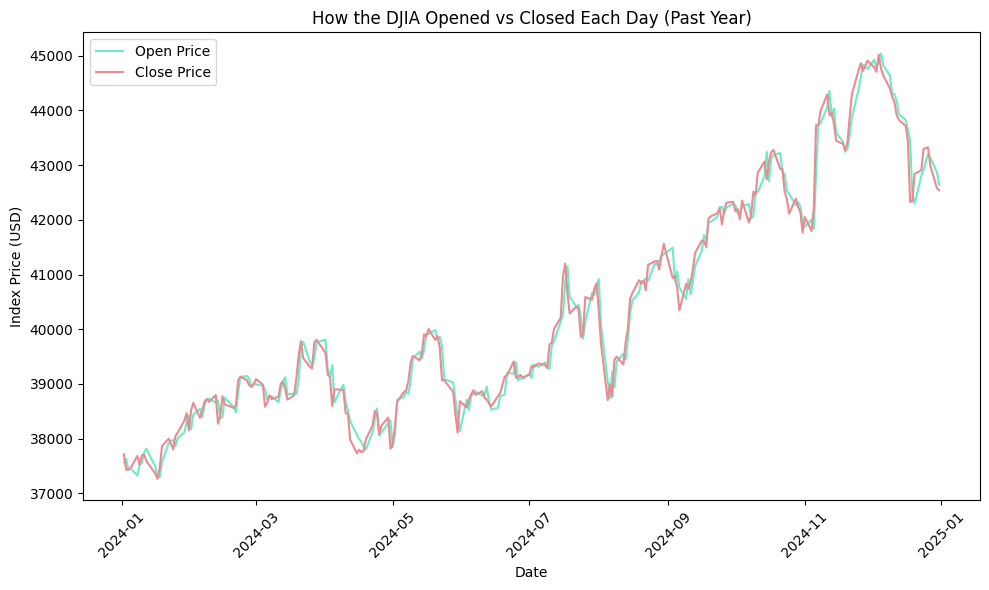

In [11]:
import pandas as pd

# Read in the data
file_path = r"C:\Users\elean\OneDrive - University of Virginia\Documents\DS 2003\HistoricalPrices.csv"
data = pd.read_csv(file_path)

# Clean up column names (removes leading/trailing spaces)
data.columns = data.columns.str.strip()

# Convert Date to datetime and sort chronologically
data['Date'] = pd.to_datetime(data['Date'], format="%m/%d/%y")
data = data.sort_values('Date')

# Plot Open and Close prices
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data['Open'], color='#68EDC6', label='Open Price')   # HEX blue
plt.plot(data['Date'], data['Close'], color='#EB8A90', label='Close Price') # HEX orange

# Add scaffolding
plt.title("How the DJIA Opened vs Closed Each Day (Past Year)")
plt.xlabel("Date")
plt.ylabel("Index Price (USD)")
plt.legend()

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Display the graph neatly
plt.tight_layout()
plt.show()


### Problem 2
*3 points*

Using the Dow Jones Industrial Average data, recreate the monthly average dataset we saw in the notebook from class. Keep all 12 months for this problem.    

Add the following scaffolding to the graph: 
- $x$-axis label
- $y$-axis label: remember to be specific about the measurement
- Color: Change the color of the bar that correlates to the highest monthly average. Change the rest of the bars to gray. 
- Title: Add a title that is descriptive and goes beyond the $x$ and $y$ axis labels (think about storytelling and the coloring of the bar you did). 


Rubric
- 1 point for creating the graph
- 2 points for creating the graph and correctly adding two of the scaffolding elements
- 3 points for creating the graph and correctly adding all four scaffolding elements

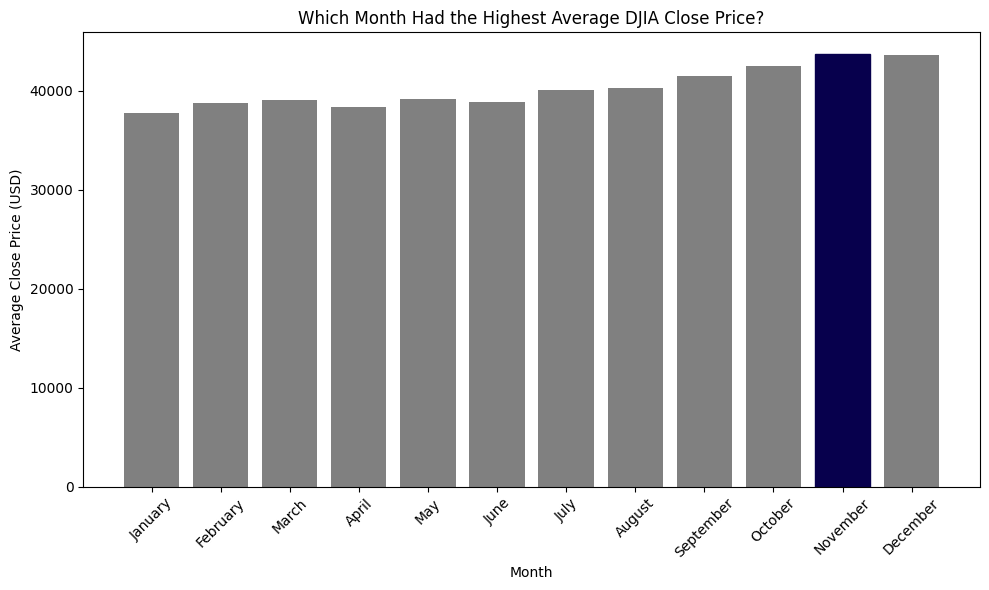

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in the data
file_path = r"C:\Users\elean\OneDrive - University of Virginia\Documents\DS 2003\HistoricalPrices.csv"
data = pd.read_csv(file_path)

# Clean up column names
data.columns = data.columns.str.strip()

# Convert Date to datetime and sort
data['Date'] = pd.to_datetime(data['Date'], format="%m/%d/%y")
data = data.sort_values('Date')

# Create a "Month" column (as month name)
data['Month'] = data['Date'].dt.strftime('%B')

# Group by month (1–12) to get average Close price
monthly_avg = data.groupby(data['Date'].dt.month)['Close'].mean()

# Get month names in correct order
month_names = data['Date'].dt.month_name().unique()
month_names_ordered = [pd.to_datetime(str(m), format='%m').strftime('%B') for m in range(1,13)]

# Ensure values are aligned with Jan–Dec order
monthly_avg = monthly_avg.reindex(range(1,13))

# Find the month with the highest average
max_month = monthly_avg.idxmax()

# Plot
plt.figure(figsize=(10,6))
bars = plt.bar(month_names_ordered, monthly_avg, color='gray')

# Highlight the highest month
bars[max_month-1].set_color('#07004D')  # blue for highest

# Add scaffolding
plt.title("Which Month Had the Highest Average DJIA Close Price?")
plt.xlabel("Month")
plt.ylabel("Average Close Price (USD)")

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### Problem 3
*4 points*

Seaborn is a Python data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. In this problem, you will create a scatter plot using Seaborn. Seaborn documentation can be found here: [Seaborn](https://seaborn.pydata.org/). 

In [8]:
#import seaborn
# if you have not installed seaborn, you can install it using pip [remove the pip install seaborn from the notebook]
import seaborn as sns #sns is the common alias for seaborn
 
# Seaborn come with a few datasets to get you started and one of them is the famous iris dataset. 
# You can load the iris dataset using the following code:
iris = sns.load_dataset('iris')
iris.head() # This will display the first 5 rows of the dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


> More on the [Iris Dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set#:~:text=The%20data%20set%20consists%20of,sepals%20and%20petals%2C%20in%20centimeters.)

Create a scatter plot in Seaborn using iris dataset. Make the points different colors based on the species.

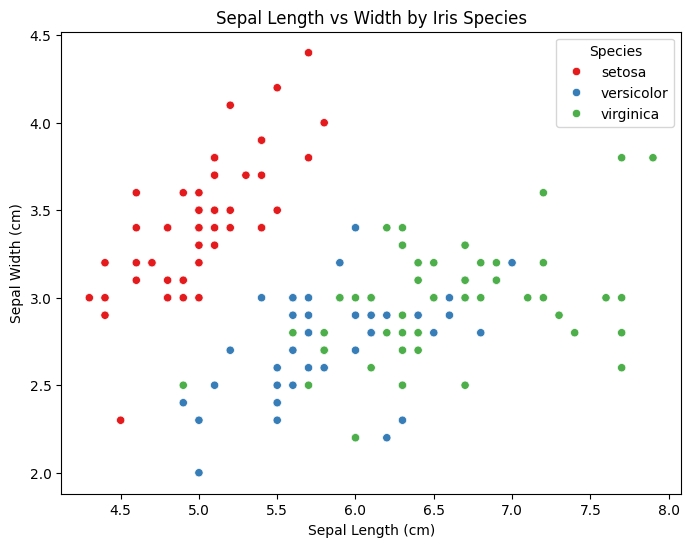

In [9]:


# Load the iris dataset
iris = sns.load_dataset('iris')

# Create scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=iris,
    x="sepal_length",
    y="sepal_width",
    hue="species",        # colors by species
    palette="Set1"        # Seaborn color palette (red, blue, green)
)

# Add scaffolding
plt.title("Sepal Length vs Width by Iris Species")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")

plt.legend(title="Species")
plt.show()


Update the following elements:
- $x$-axis label to 'Sepal Length' (hint: what are the units?)
- $y$-axis label to 'Sepal Width' (hint: what are the units?)
- Add a title
- Change the colors using a seaborn palette different from the default. Check out the palettes [here](https://r02b.github.io/seaborn_palettes/)
- Move the legend outside of the plotting area.
- Keep only the $x$ and $y$ axis lines (i.e., remove the right and top lines).

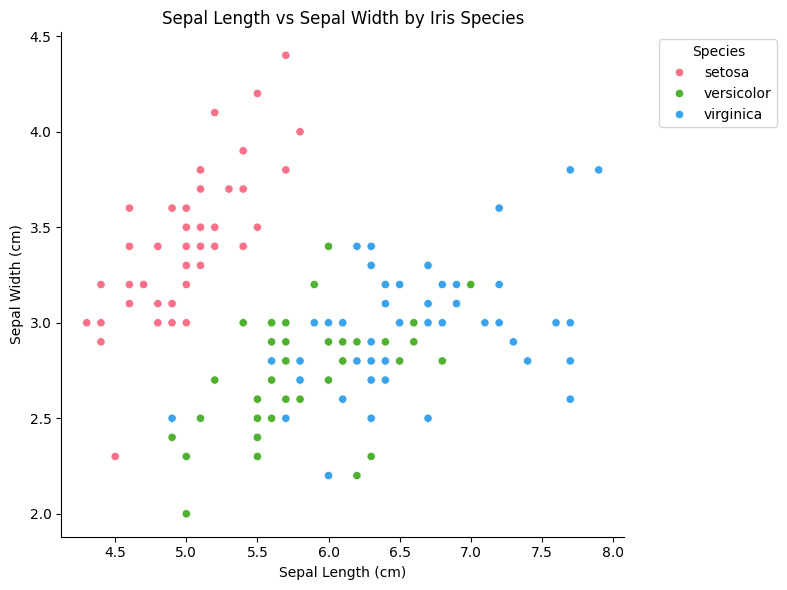

In [10]:
# Load the iris dataset
iris = sns.load_dataset('iris')

# Create scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=iris,
    x="sepal_length",
    y="sepal_width",
    hue="species",
    palette="husl"   # Change to a different seaborn palette (e.g., 'husl')
)

# Add scaffolding
plt.title("Sepal Length vs Sepal Width by Iris Species")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")

# Move legend outside of plotting area
plt.legend(title="Species", bbox_to_anchor=(1.05, 1), loc='upper left')

# Keep only left and bottom axis lines
sns.despine(top=True, right=True)

plt.tight_layout()
plt.show()


Rubric
- 1 point for creating the initial seaborn scatter plot
- 2 points for the inital scatter plot and correctly changing the axes titles and adding a title.
- 3 points for the initial scatter plot and correctly changing the axes titles, adding a title, and changing the colors.
- 4 points for the initial scatter plot and correctly changing the axes titles, adding a title, changing the colors, and moving the legend outside of the plotting area.

### Problem 4   
*5 points*  
Provide a brief answer to the following questions:

1 - Why is `matplotlib` considered a low-level library and `seaborn` a high-level library? 

2 - Why do we still call `plt` from `matplotlib` when using `seaborn`?  

1. Matplotlib is considered a low-level library because it gives users fine-grained control over every detail of a plot, which requires writing more code. Seaborn is a high-level library built on top of matplotlib that provides pre-set styles and functions for common statistical plots. This makes it easier to create attractive visualizations with less effort.

2. We still use plt from matplotlib when working with seaborn because seaborn is built on top of matplotlib. Seaborn makes the chart, but matplotlib is what actually shows it and lets us add things like titles, labels, and legends.

Rubric
- 1 point for providing any answer to both questions
- 3 points for providing a correct answer to one question
- 5 points for providing correct answers to both questions